In [10]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate dates for 2022-2023
start_date = datetime(2022, 1, 1)
dates = [start_date + timedelta(days=x) for x in range(365*2)]

# Define channels with specific characteristics
channels = {
    'Facebook': {'trend': 1.2, 'seasonality': 0.3, 'volatility': 0.15},
    'Google Ads': {'trend': 0.9, 'seasonality': 0.1, 'volatility': 0.1},
    'TikTok': {'trend': 1.8, 'seasonality': 0.4, 'volatility': 0.25},
    'Instagram': {'trend': 1.5, 'seasonality': 0.3, 'volatility': 0.2},
    'YouTube': {'trend': 1.1, 'seasonality': 0.2, 'volatility': 0.15},
    'Twitter': {'trend': 0.7, 'seasonality': 0.2, 'volatility': 0.3}
}

campaign_types = ['App_Install', 'Brand_Awareness', 'Lead_Generation', 'Retargeting', 'Promotional']
regions = ['US_West', 'US_East', 'EU', 'APAC', 'LATAM']

def apply_trend(base_value, month_index, channel_params):
    trend_factor = 1 + (month_index * 0.02 * channel_params['trend'])
    return base_value * trend_factor

def apply_seasonality(value, month, channel_params):
    season_factor = 1.0
    if month in [11, 12]:  # Holiday season
        season_factor += 0.4 * channel_params['seasonality']
    elif month in [1, 2]:  # Post-holiday slump
        season_factor -= 0.3 * channel_params['seasonality']
    elif month in [6, 7, 8]:  # Summer variation
        season_factor -= 0.2 * channel_params['seasonality']
    elif month in [3, 4]:  # Spring boost
        season_factor += 0.2 * channel_params['seasonality']
    
    return value * season_factor

def add_market_shock(value, date, channel_params):
    if np.random.random() < 0.05:  # 5% chance of shock
        shock_factor = np.random.normal(1, channel_params['volatility'])
        return value * shock_factor
    return value

data = []
for date in dates:
    month_index = (date.year - 2022) * 12 + date.month - 1
    
    for channel in channels:
        channel_params = channels[channel]
        
        for campaign_type in campaign_types:
            for region in regions:
                if np.random.random() > 0.6:
                    # Scaled down base metrics
                    base_impressions = np.random.normal(1000, 300)  # Reduced from 100000
                    
                    # Apply channel-specific trends and seasonality
                    base_impressions = apply_trend(base_impressions, month_index, channel_params)
                    base_impressions = apply_seasonality(base_impressions, date.month, channel_params)
                    base_impressions = add_market_shock(base_impressions, date, channel_params)
                    
                    # Conversion rates vary by channel
                    channel_conv_rate = np.random.normal(
                        0.08 * channel_params['trend'],
                        0.02 * channel_params['volatility']
                    )
                    
                    clicks = int(base_impressions * channel_conv_rate)
                    conversions = int(clicks * np.random.normal(0.1, 0.02))
                    installs = int(conversions * np.random.normal(0.8, 0.1))
                    
                    # Cost and revenue calculations (scaled down)
                    cost_per_click = np.random.normal(0.5, 0.15) * channel_params['trend']
                    cost = clicks * cost_per_click
                    
                    revenue_per_conversion = np.random.normal(50, 10)  # Reduced from 80
                    revenue = conversions * revenue_per_conversion
                    
                    # Apply market conditions
                    if date.month in [11, 12]:  # Holiday season
                        revenue *= 1.4
                    elif date.month in [1, 2]:  # Post-holiday
                        revenue *= 0.7
                    
                    month_year = date.strftime('%Y-%m')
                    
                    row = {
                        'month_year': month_year,
                        'Channel': channel,
                        'Campaign_Type': campaign_type,
                        'Region': region,
                        'Impressions': int(base_impressions),
                        'Clicks': clicks,
                        'Conversions': conversions,
                        'Installs': installs,
                        'Cost': round(cost, 2),
                        'Revenue': round(revenue, 2),
                        'Profit': round(revenue - cost, 2)
                    }
                    data.append(row)

# Create DataFrame
mktg = pd.DataFrame(data)

# Save to CSV
mktg.to_csv('marketing_performance_2022_2023.csv', index=False)

mktg.columns = mktg.columns.str.lower()

# Print sample and stats
mktg.head(5)

,month_year,channel,campaign_type,region,impressions,clicks,conversions,installs,cost,revenue,profit
0,2022-01,Facebook,App_Install,US_East,1086,109,11,9,54.00,344.56,290.56
1,2022-01,Facebook,Brand_Awareness,EU,793,74,9,6,45.30,225.24,179.94
2,2022-01,Facebook,Lead_Generation,US_West,746,73,6,5,43.62,165.58,121.95
3,2022-01,Facebook,Lead_Generation,EU,1134,104,16,14,66.49,658.76,592.26
4,2022-01,Facebook,Lead_Generation,APAC,878,83,9,6,29.68,259.52,229.84


In [11]:
agg_mktg = mktg.groupby('month_year').agg({'impressions': 'sum', 'clicks': 'sum', 'conversions': 'sum', 'installs': 'sum', 'cost': 'sum', 'revenue': 'sum', 'profit': 'sum'}).reset_index()
agg_mktg

,month_year,impressions,clicks,conversions,installs,cost,revenue,profit
0,2022-01,1693770,160476,15178,11217,105181.17,532917.88,427736.63
1,2022-02,1605437,151570,14312,10602,98600.21,505662.21,407061.83
2,2022-03,2087336,200607,19180,14467,130816.93,954790.47,823973.40
3,2022-04,2038055,199467,19031,14354,133089.99,953186.53,820096.48
4,2022-05,2031431,194319,18555,13915,128164.01,925251.26,797087.43
5,2022-06,1891924,181853,17340,12916,120059.45,865975.97,745916.36
6,2022-07,2053511,196787,18752,14038,128813.33,929849.35,801036.07
7,2022-08,2083430,202013,19311,14467,133842.68,973795.10,839952.31
8,2022-09,2171195,206793,19700,14867,137319.30,978450.05,841130.87
9,2022-10,2259420,220222,21235,16157,147116.40,1061257.15,914140.93


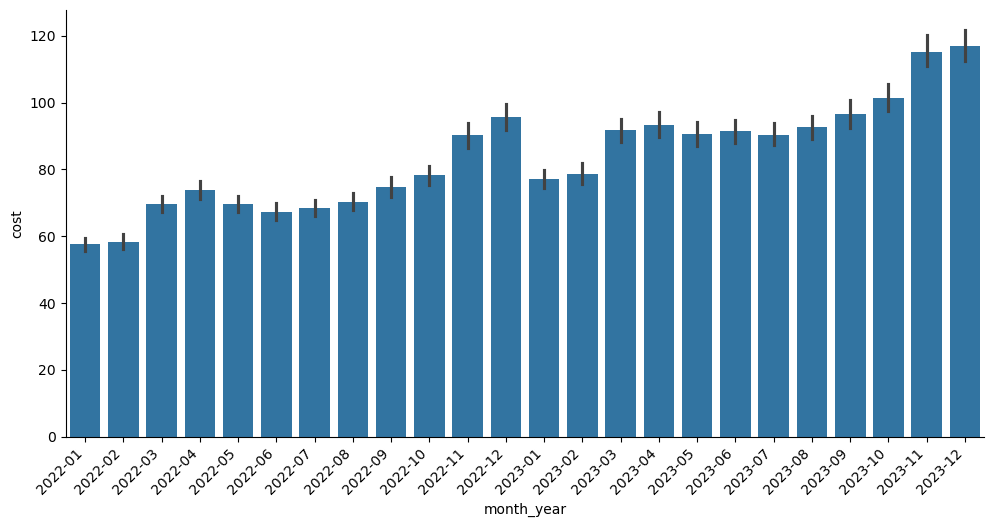

In [15]:
# Your existing code
plot = sns.catplot(data=mktg, x='month_year', y='cost', kind='bar', height=5, aspect=2)

# Rotate x-axis labels
plot.set_xticklabels(rotation=45, ha='right')

# Show the plot
plt.show()

<Figure size 1500x1000 with 0 Axes>

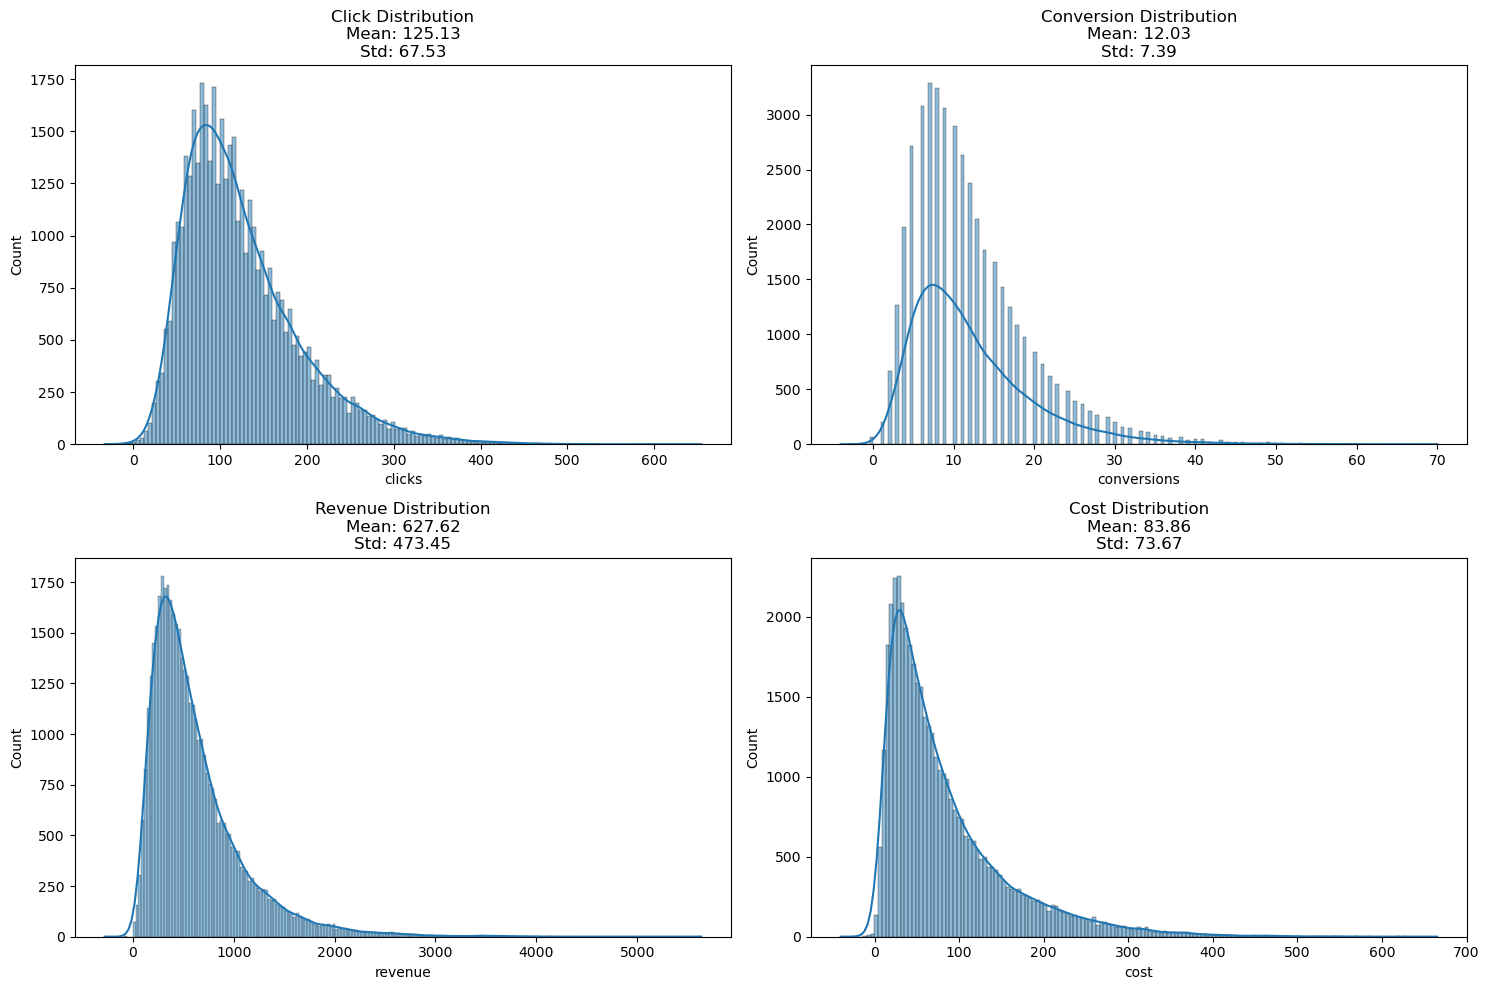

In [21]:
# Distribution Analysis
plt.figure(figsize=(15, 10))

# Create subplot grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Distribution plots with statistical info
sns.histplot(data=mktg, x='clicks', kde=True, ax=ax1)
ax1.set_title(f'Click Distribution\nMean: {mktg.clicks.mean():.2f}\nStd: {mktg.clicks.std():.2f}')

sns.histplot(data=mktg, x='conversions', kde=True, ax=ax2)
ax2.set_title(f'Conversion Distribution\nMean: {mktg.conversions.mean():.2f}\nStd: {mktg.conversions.std():.2f}')

sns.histplot(data=mktg, x='revenue', kde=True, ax=ax3)
ax3.set_title(f'Revenue Distribution\nMean: {mktg.revenue.mean():.2f}\nStd: {mktg.revenue.std():.2f}')

sns.histplot(data=mktg, x='cost', kde=True, ax=ax4)
ax4.set_title(f'Cost Distribution\nMean: {mktg.cost.mean():.2f}\nStd: {mktg.cost.std():.2f}')

plt.tight_layout()

# Distribution Shape

- **Right-Skewed Distribution**:  
  The data shows a right-skewed (positively skewed) distribution.  
  - Most clicks fall between **0-200**, with the **peak around 100** clicks.  
  - A long "tail" extends to the right, indicating some campaigns achieve much higher clicks (up to **600**).

---

# Key Statistics

- **Mean (average)**: **125.13 clicks**  
- **Standard Deviation**: **67.53 clicks**

### Interpretation:
- **68% of campaigns** fall between:
  - **58 clicks**: \(125 - 67\)
  - **193 clicks**: \(125 + 67\)
- Campaigns outside this range might be:
  - **Underperforming** or
  - **Exceptionally successful**

---

# Practical Interpretation

- The **most common outcome**: Around **100 clicks** per campaign.
- **Very few campaigns** achieve more than **400 clicks**.
- Use the following ranges to classify performance:
  - **Below 58 clicks**: Underperforming
  - **58-193 clicks**: Normal performance range
  - **Above 193 clicks**: Exceptionally good performance

---

# Business Insights

- **Set Realistic Goals**:
  - Use this data to establish achievable benchmarks for campaigns.
- **Optimization Opportunities**:
  - Focus on campaigns with **less than 58 clicks** for potential improvements.
- **Learn from Outliers**:
  - Analyze high-performing campaigns (**300+ clicks**) to replicate their success.
- **Performance Benchmarks**:
  - Use these ranges to set targets for future campaigns.